In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [159]:
#Reading the data
healthData = pd.read_excel("HealthCareData.xlsx")

In [160]:
healthData.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


# Task 1

In [161]:
#Checking shape 
healthData.shape

(303, 14)

In [162]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [163]:
healthData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [164]:
#Check and remove duplicates
healthData.drop_duplicates(inplace=True)

In [165]:
#removed one duplicate row
healthData.shape

(302, 14)

# Task -2 

In [166]:
# a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

healthData.describe()

#There seems to be some outlier data in rest BP, thalach, cholestrol


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [167]:
# Outlier Removal
outlier_columns = ["trestbps","chol","thalach", "oldpeak"]

In [168]:
 # b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

objectColumns = healthData.select_dtypes(include='object').nunique()
print(objectColumns) 
#There is no categorical data available 

Series([], dtype: float64)


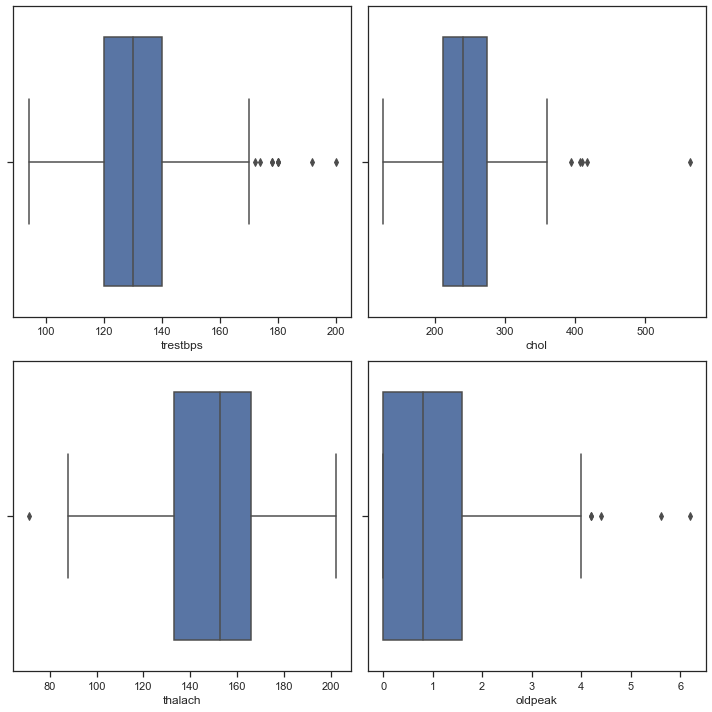

In [169]:
# Checking the outliers
fig, ax =  plt.subplots(nrows = 2, ncols =2, figsize=(10,10))
ax = ax.flatten()

for i, var in enumerate(outlier_columns):
    sns.boxplot(x = var, data = healthData, ax = ax[i])
fig.tight_layout()
plt.show()

In [170]:
# removing the outliers
def remove_outliers(column):

    Q1 =column.quantile(0.25)

    Q3 = column.quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1- 1.5*IQR

    upper_bound = Q3 + 1.5*IQR

    

    return column[(column>=lower_bound)&(column<=upper_bound)]

 

for col in outlier_columns:

    healthData[col] = remove_outliers(healthData[col])



In [171]:
# c.	Study the occurrence of CVD across the Age category
healthData['age_range']= pd.cut(healthData['age'], bins=[0, 18, 25, 35, 50, 65, 100],labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+'])

In [172]:
age_range_CVD_counts = healthData.groupby('age_range')['target'].count()
age_range_CVD_counts

age_range
0-18       0
19-25      0
26-35      7
36-50     87
51-65    175
65+       33
Name: target, dtype: int64

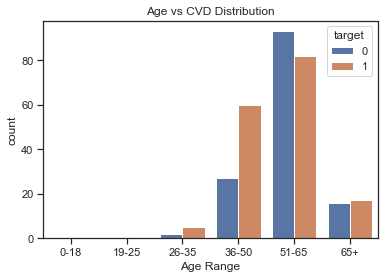

In [173]:
#plotting the distribution 
sns.countplot(x = 'age_range', hue = 'target', data= healthData)
plt.title("Age vs CVD Distribution")
plt.xlabel("Age Range")
plt.show()
#From thr below graph we can analyse that the potential CVD is high between 36 to 65 years of age.

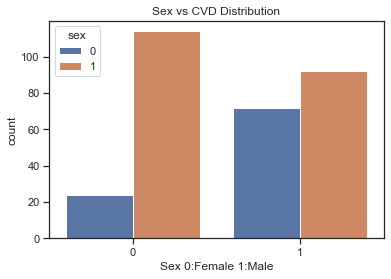

In [174]:
# d.	Study the composition of all patients with respect to the Sex category

sns.countplot(x = 'target', hue = 'sex', data = healthData)
plt.title('Sex vs CVD Distribution')
plt.xlabel('Sex 0:Female 1:Male')
plt.show()
#From the below plot we can deduce that Male population is more suseptible to heart problems as 1 meaning CVD.

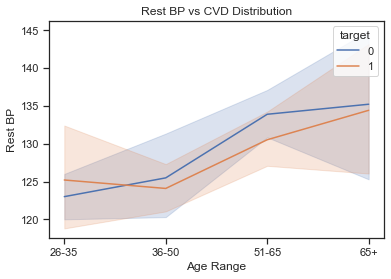

In [175]:
# e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
sns.lineplot(y = 'trestbps', x= 'age_range', hue = 'target', data = healthData)
plt.title('Rest BP vs CVD Distribution')
plt.xlabel('Age Range')
plt.ylabel('Rest BP')
plt.show()
###
# From the below plot we can deduce that people with high rest bp are more prone to CVD. 
#This trend however is not obeserved with patient below age of 36, thus we cannot definetly conclude.
#The third factor Age plays an important role in determining the correlation as we can see that rest BP rises with Age between 36 to 60 years.
###

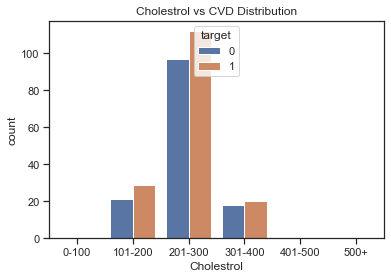

In [176]:
# f.	Describe the relationship between cholesterol levels and a target variable
healthData['chol_range'] = pd.cut(healthData['chol'], bins=[0, 100, 200, 300, 400, 500, 1000],labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])
sns.countplot(x = 'chol_range', hue = 'target', data = healthData)
plt.title('Cholestrol vs CVD Distribution')
plt.xlabel('Cholestrol')

plt.show()
#people with high cholestrol are more prone to CVD 

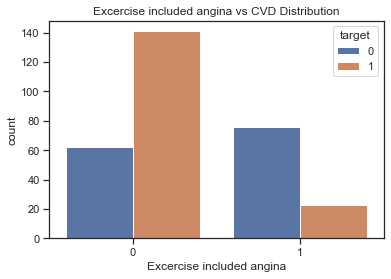

In [177]:
# g.	State what relationship exists between peak exercising and the occurrence of a heart attack

sns.countplot(x = 'exang', hue = 'target', data = healthData)
plt.title('Excercise included angina vs CVD Distribution')
plt.xlabel('Excercise included angina')

plt.show()
#Maximum people without excercisr related angina have had heart attack. Data shows that people doing excercise are less prone to heart attack.

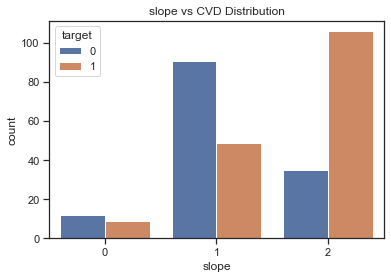

In [178]:
sns.countplot(x = 'slope', hue = 'target', data = healthData)
plt.title('slope vs CVD Distribution')
plt.xlabel('slope')

plt.show()
#people doinh high ST excercise are more prone to heartattack.

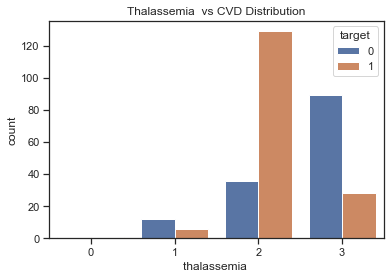

In [179]:
# h.	Check if thalassemia is a major cause of CVD

sns.countplot(x = 'thal', hue = 'target', data = healthData)
plt.title('Thalassemia  vs CVD Distribution')
plt.xlabel('thalassemia ')

plt.show()
#Thalassemia seems to be have high correlation with heart attack if at level 2 which is irreversible. people with thal level 2 are more prone to heart attack.

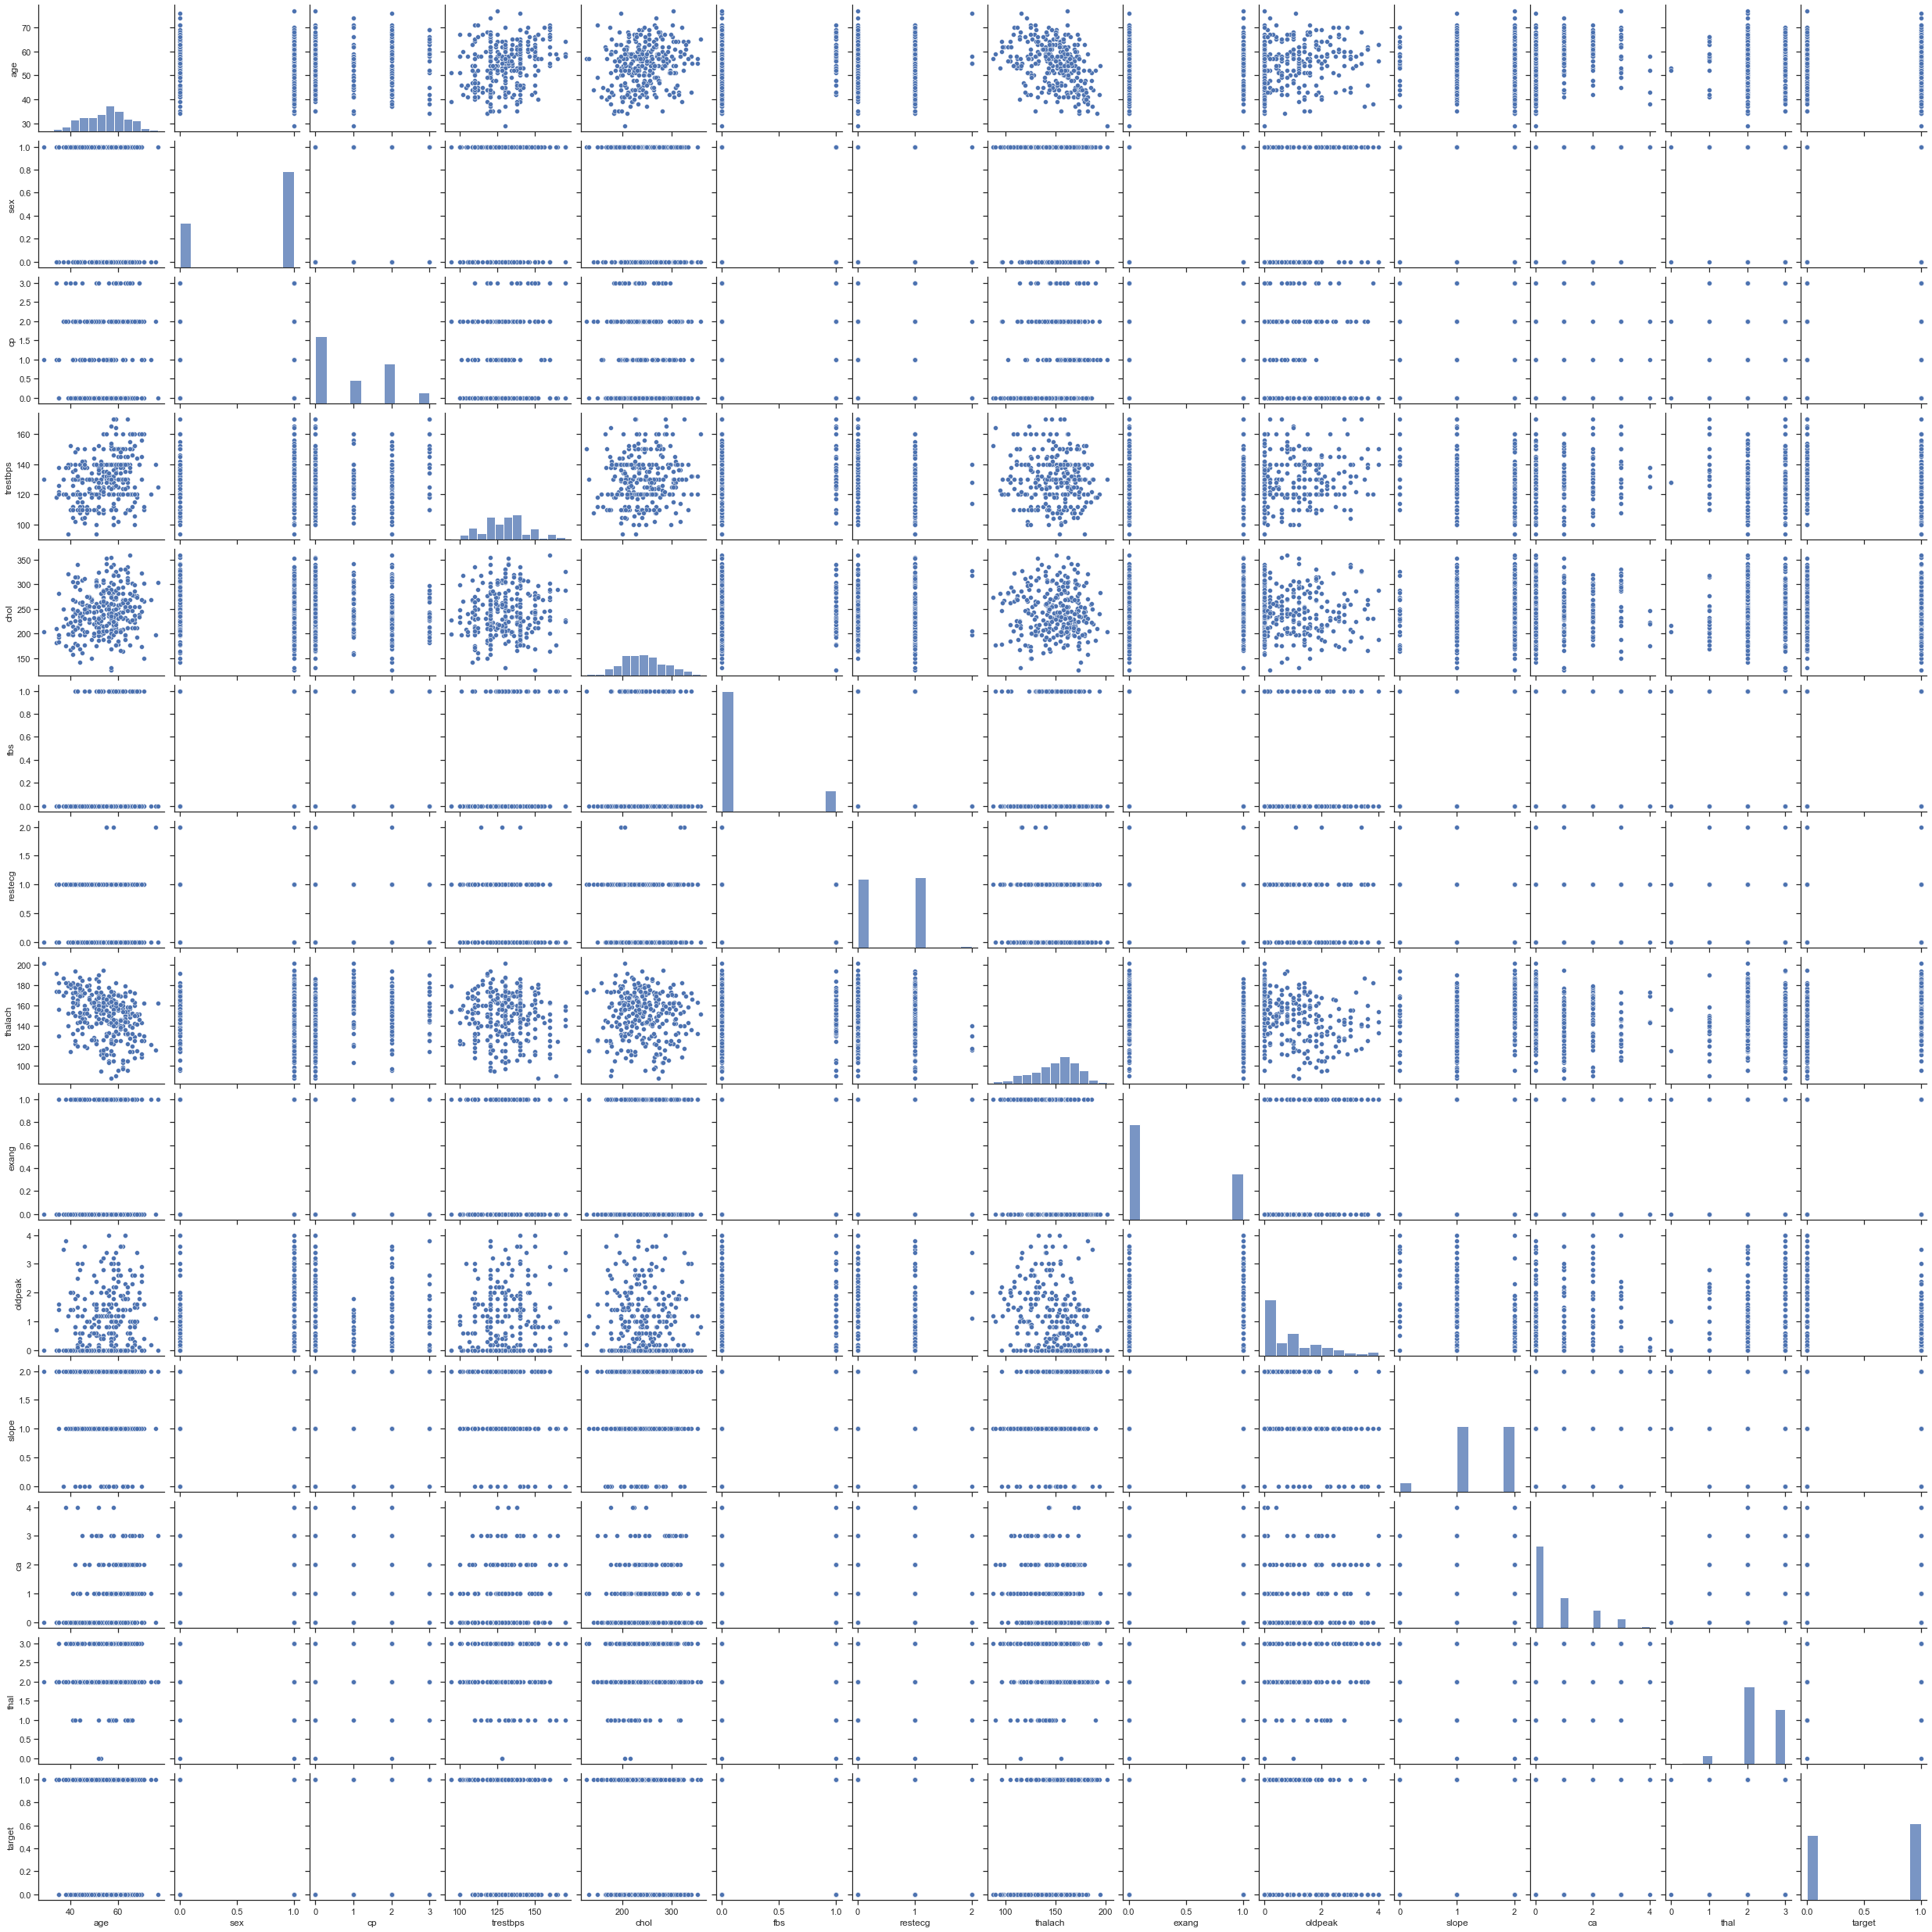

In [180]:
#j.	Use a pair plot to understand the relationship between all the given variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(healthData)

plt.show()

<AxesSubplot:>

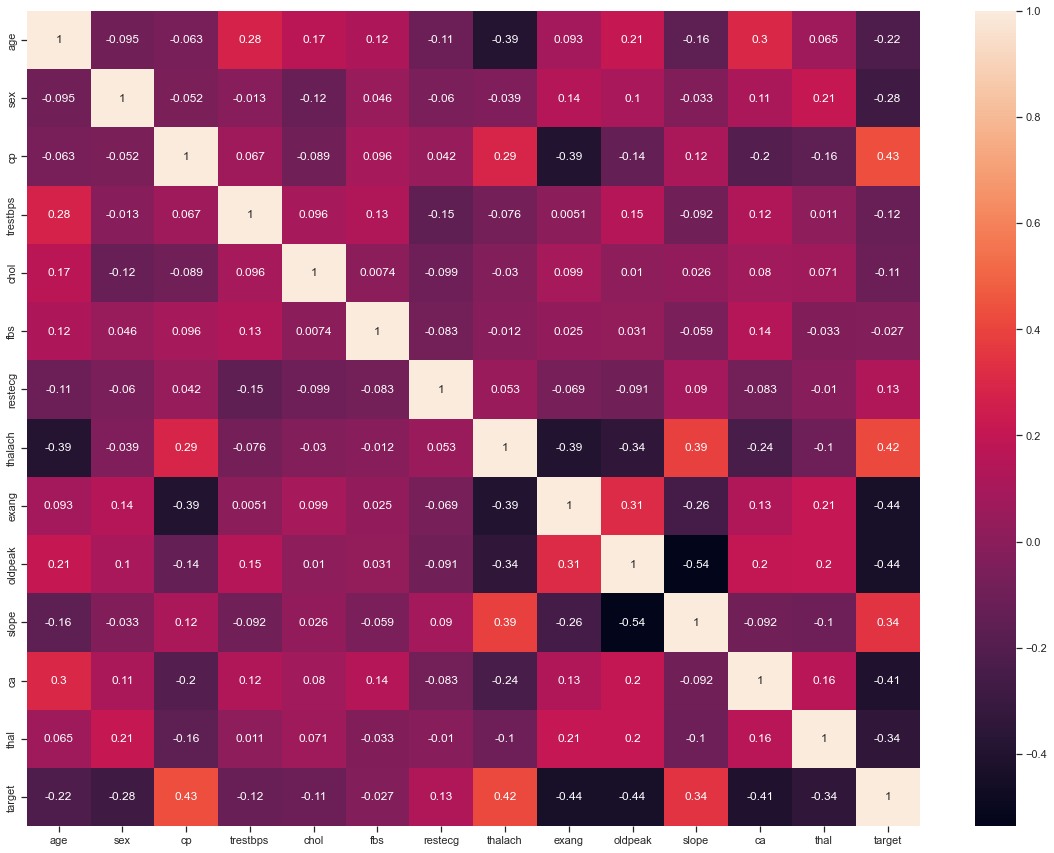

In [181]:
#i.	List how the other factors determine the occurrence of CVD
plt.figure(figsize=(20,15))
sns.heatmap(healthData.corr(), annot = True)

#Chest Pain type and thalassemia seems to be the most positive correlated variables and exang and old peak are most -ve corelated with target.
# rest variables do not seem much correlated.

In [182]:
#dropping null values
healthData.dropna(inplace=True)

# Task -3

In [183]:
# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

X = healthData.drop(["target","age_range","chol_range"], axis = 1)
y = healthData["target"]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 53)

In [185]:
#let's normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
#Model using Logistic Regression
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression()

In [200]:
y_pred = logisticReg.predict(X_test)

In [201]:
#Getting the accuracy score
logisticReg.score(X_test, y_test)

0.7894736842105263

<AxesSubplot:>

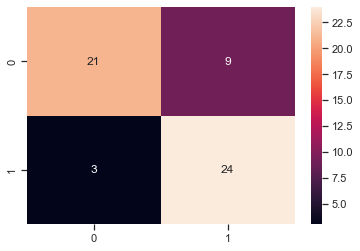

In [202]:
confusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(data = confusionMatrix, annot=True)

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.73      0.89      0.80        27

    accuracy                           0.79        57
   macro avg       0.80      0.79      0.79        57
weighted avg       0.81      0.79      0.79        57



In [204]:
# Model prediction with Random Forest.
rfclassifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100,200,150],
    'max_depth':[5,10],
    'max_features': ['sqrt', 'log2'],
    'random_state':[0,20]
    
}

grid_search = GridSearchCV(rfclassifier, param_grid, cv = 5)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 20}


In [205]:
rfclassifier = RandomForestClassifier(random_state= 20, max_depth= 10, n_estimators=200, max_features='sqrt')

In [206]:
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200,
                       random_state=20)

In [207]:
y1_pred = rfclassifier.predict(X_test)

In [208]:
print(accuracy_score(y_test,y1_pred)) #We can observe a great difference between random forest and logistic regression accuracy score.

0.8596491228070176


In [209]:
y1_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

<AxesSubplot:>

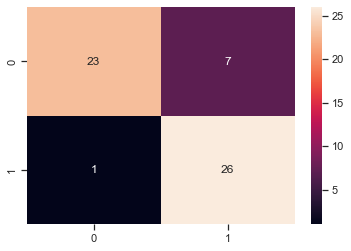

In [210]:
cm  = confusion_matrix(y_test, y1_pred)
sns.heatmap(data =cm, annot= True)

In [211]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.79      0.96      0.87        27

    accuracy                           0.86        57
   macro avg       0.87      0.86      0.86        57
weighted avg       0.88      0.86      0.86        57

